In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv('crop_yield.csv')

In [3]:
train

,State_Name,Season,Crop,Area,Production,soil_type
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.00,Laterite
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2061.00,Laterite
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,2083.00,Laterite
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,1525.00,Laterite
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,805.85,Laterite
...,...,...,...,...,...,...
94370,West Bengal,Whole Year,Turmeric,270.0,166.00,Loamy
94371,West Bengal,Whole Year,Turmeric,284.0,229.00,Loamy
94372,West Bengal,Whole Year,Turmeric,294.0,261.00,Loamy
94373,West Bengal,Whole Year,Turmeric,289.0,178.00,Loamy


In [4]:
train.dtypes

State_Name     object
Season         object
Crop           object
Area          float64
Production    float64
soil_type      object
dtype: object

In [5]:
train.isnull().sum()

State_Name    0
Season        0
Crop          0
Area          0
Production    0
soil_type     0
dtype: int64

In [6]:
train['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Goa',
       'Karnataka', 'Kerala', 'Meghalaya', 'Puducherry', 'Tamil Nadu',
       'West Bengal', 'Bihar', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Gujarat', 'Haryana', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Rajasthan', 'Telangana ', 'Uttar Pradesh', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Jammu and Kashmir ', 'Nagaland', 'Odisha',
       'Uttarakhand', 'Mizoram', 'Punjab', 'Tripura', 'Chandigarh',
       'Jharkhand', 'Sikkim'], dtype=object)

In [7]:
train['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Rabi       ', 'Winter     ',
       'Autumn     ', 'Summer     '], dtype=object)

In [8]:
train['Crop'].unique()

array(['Arecanut', 'Banana', 'Dry chillies', 'Coconut ', 'Cotton(lint)',
       'Dry ginger', 'Groundnut', 'Maize', 'Moong(Green Gram)', 'Onion',
       'Paddy', 'Ragi', 'Rice', 'Sugarcane', 'Tobacco', 'Turmeric'],
      dtype=object)

In [10]:
train['soil_type'].unique()

array([' Laterite', 'Clayey', ' loamy', 'Sandy ', 'Black', 'Sandy',
       'Alluvial', 'Loamy'], dtype=object)

In [11]:
plt.rcParams["figure.figsize"] = (30,15)

In [12]:
train.loc[train['Crop']=='Arecanut', 'Crop'] = 0
train.loc[train['Crop']=='Banana', 'Crop'] =1
train.loc[train['Crop']=='Dry chillies', 'Crop'] =2
train.loc[train['Crop']=='Coconut ', 'Crop'] = 3
train.loc[train['Crop']=='Cotton(lint)', 'Crop'] =4
train.loc[train['Crop']=='Dry ginger', 'Crop'] = 5
train.loc[train['Crop']=='Groundnut', 'Crop'] =6
train.loc[train['Crop']=='Maize', 'Crop'] = 7
train.loc[train['Crop']=='Moong(Green Gram)', 'Crop'] =8
train.loc[train['Crop']=='Onion', 'Crop'] = 9
train.loc[train['Crop']=='Paddy', 'Crop'] =10
train.loc[train['Crop']=='Ragi', 'Crop'] =11
train.loc[train['Crop']=='Sugarcane', 'Crop'] =12
train.loc[train['Crop']=='Tobacco', 'Crop'] =13
train.loc[train['Crop']=='Turmeric', 'Crop'] =14
train.loc[train['Crop']=='Rice', 'Crop'] =15



In [13]:
train.loc[train['soil_type']=='Sandy', 'soil_type'] = 0
train.loc[train['soil_type']=='Sandy ', 'soil_type'] = 0
train.loc[train['soil_type']=='Red', 'soil_type'] =1
train.loc[train['soil_type']=='Black', 'soil_type'] =2
train.loc[train['soil_type']=='Clayey', 'soil_type'] = 3
train.loc[train['soil_type']=='Alluvial', 'soil_type'] =4
train.loc[train['soil_type']=='Loamy', 'soil_type'] = 5
train.loc[train['soil_type']==' loamy', 'soil_type'] = 5

train.loc[train['soil_type']==' Laterite', 'soil_type'] = 6

In [14]:
train['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Goa',
       'Karnataka', 'Kerala', 'Meghalaya', 'Puducherry', 'Tamil Nadu',
       'West Bengal', 'Bihar', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Gujarat', 'Haryana', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Rajasthan', 'Telangana ', 'Uttar Pradesh', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Jammu and Kashmir ', 'Nagaland', 'Odisha',
       'Uttarakhand', 'Mizoram', 'Punjab', 'Tripura', 'Chandigarh',
       'Jharkhand', 'Sikkim'], dtype=object)

In [15]:
train.loc[train['State_Name']=='Andaman and Nicobar Islands', 'State_Name'] = 0
train.loc[train['State_Name']=='Andhra Pradesh', 'State_Name'] =1
train.loc[train['State_Name']=='Assam', 'State_Name'] =3
train.loc[train['State_Name']=='Goa', 'State_Name'] =4
train.loc[train['State_Name']=='Karnataka', 'State_Name'] =5
train.loc[train['State_Name']=='Kerala', 'State_Name'] =6
train.loc[train['State_Name']=='Meghalaya', 'State_Name'] =7
train.loc[train['State_Name']=='Puducherry', 'State_Name'] =8
train.loc[train['State_Name']=='Tamil Nadu', 'State_Name'] =9
train.loc[train['State_Name']=='West Bengal', 'State_Name'] =10
train.loc[train['State_Name']=='Bihar', 'State_Name'] =11
train.loc[train['State_Name']=='Chhattisgarh', 'State_Name'] =12
train.loc[train['State_Name']=='Dadra and Nagar Haveli', 'State_Name'] =13
train.loc[train['State_Name']=='Gujarat', 'State_Name'] =14
train.loc[train['State_Name']=='Haryana', 'State_Name'] =15
train.loc[train['State_Name']=='Madhya Pradesh', 'State_Name'] =16
train.loc[train['State_Name']=='Maharashtra', 'State_Name'] =17
train.loc[train['State_Name']=='Manipur', 'State_Name'] =18
train.loc[train['State_Name']=='Rajasthan', 'State_Name'] =19
train.loc[train['State_Name']=='Telangana ', 'State_Name'] =20
train.loc[train['State_Name']=='Uttar Pradesh', 'State_Name'] =21
train.loc[train['State_Name']=='Arunachal Pradesh', 'State_Name'] =22
train.loc[train['State_Name']=='Himachal Pradesh', 'State_Name'] =23
train.loc[train['State_Name']=='Jammu and Kashmir ', 'State_Name'] =24
train.loc[train['State_Name']=='Nagaland', 'State_Name'] =25
train.loc[train['State_Name']=='Odisha', 'State_Name'] =26
train.loc[train['State_Name']=='Uttarakhand', 'State_Name'] =27
train.loc[train['State_Name']=='Mizoram', 'State_Name'] =28
train.loc[train['State_Name']=='Punjab', 'State_Name'] =29
train.loc[train['State_Name']=='Tripura', 'State_Name'] =30
train.loc[train['State_Name']=='Chandigarh', 'State_Name'] =31
train.loc[train['State_Name']=='Jharkhand', 'State_Name'] =32
train.loc[train['State_Name']=='Sikkim', 'State_Name'] =33          











In [18]:
train['State_Name'].unique()

array([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=object)

In [16]:
train

,State_Name,Season,Crop,Area,Production,soil_type
0,0,Kharif,0,1254.0,2000.00,6
1,0,Kharif,0,1254.0,2061.00,6
2,0,Whole Year,0,1258.0,2083.00,6
3,0,Whole Year,0,1261.0,1525.00,6
4,0,Whole Year,0,1264.7,805.85,6
...,...,...,...,...,...,...
94370,10,Whole Year,14,270.0,166.00,5
94371,10,Whole Year,14,284.0,229.00,5
94372,10,Whole Year,14,294.0,261.00,5
94373,10,Whole Year,14,289.0,178.00,5


In [23]:
train['Crop'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 12, 13, 14], dtype=object)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94375 entries, 0 to 94374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State_Name  94375 non-null  object 
 1   Season      94375 non-null  object 
 2   Crop        94375 non-null  object 
 3   Area        94375 non-null  float64
 4   Production  94375 non-null  float64
 5   soil_type   94375 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.3+ MB


In [66]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,94375.0,1.441920e+04,4.147134e+04,0.1,100.0,736.0,6799.0,8.770290e+05
Production,94375.0,1.464129e+06,2.732481e+07,0.0,155.0,1813.0,19096.0,1.250800e+09


In [68]:
corr=train.corr()
corr

,Area,Production
Area,1.000000,0.072074
Production,0.072074,1.000000


<AxesSubplot:>

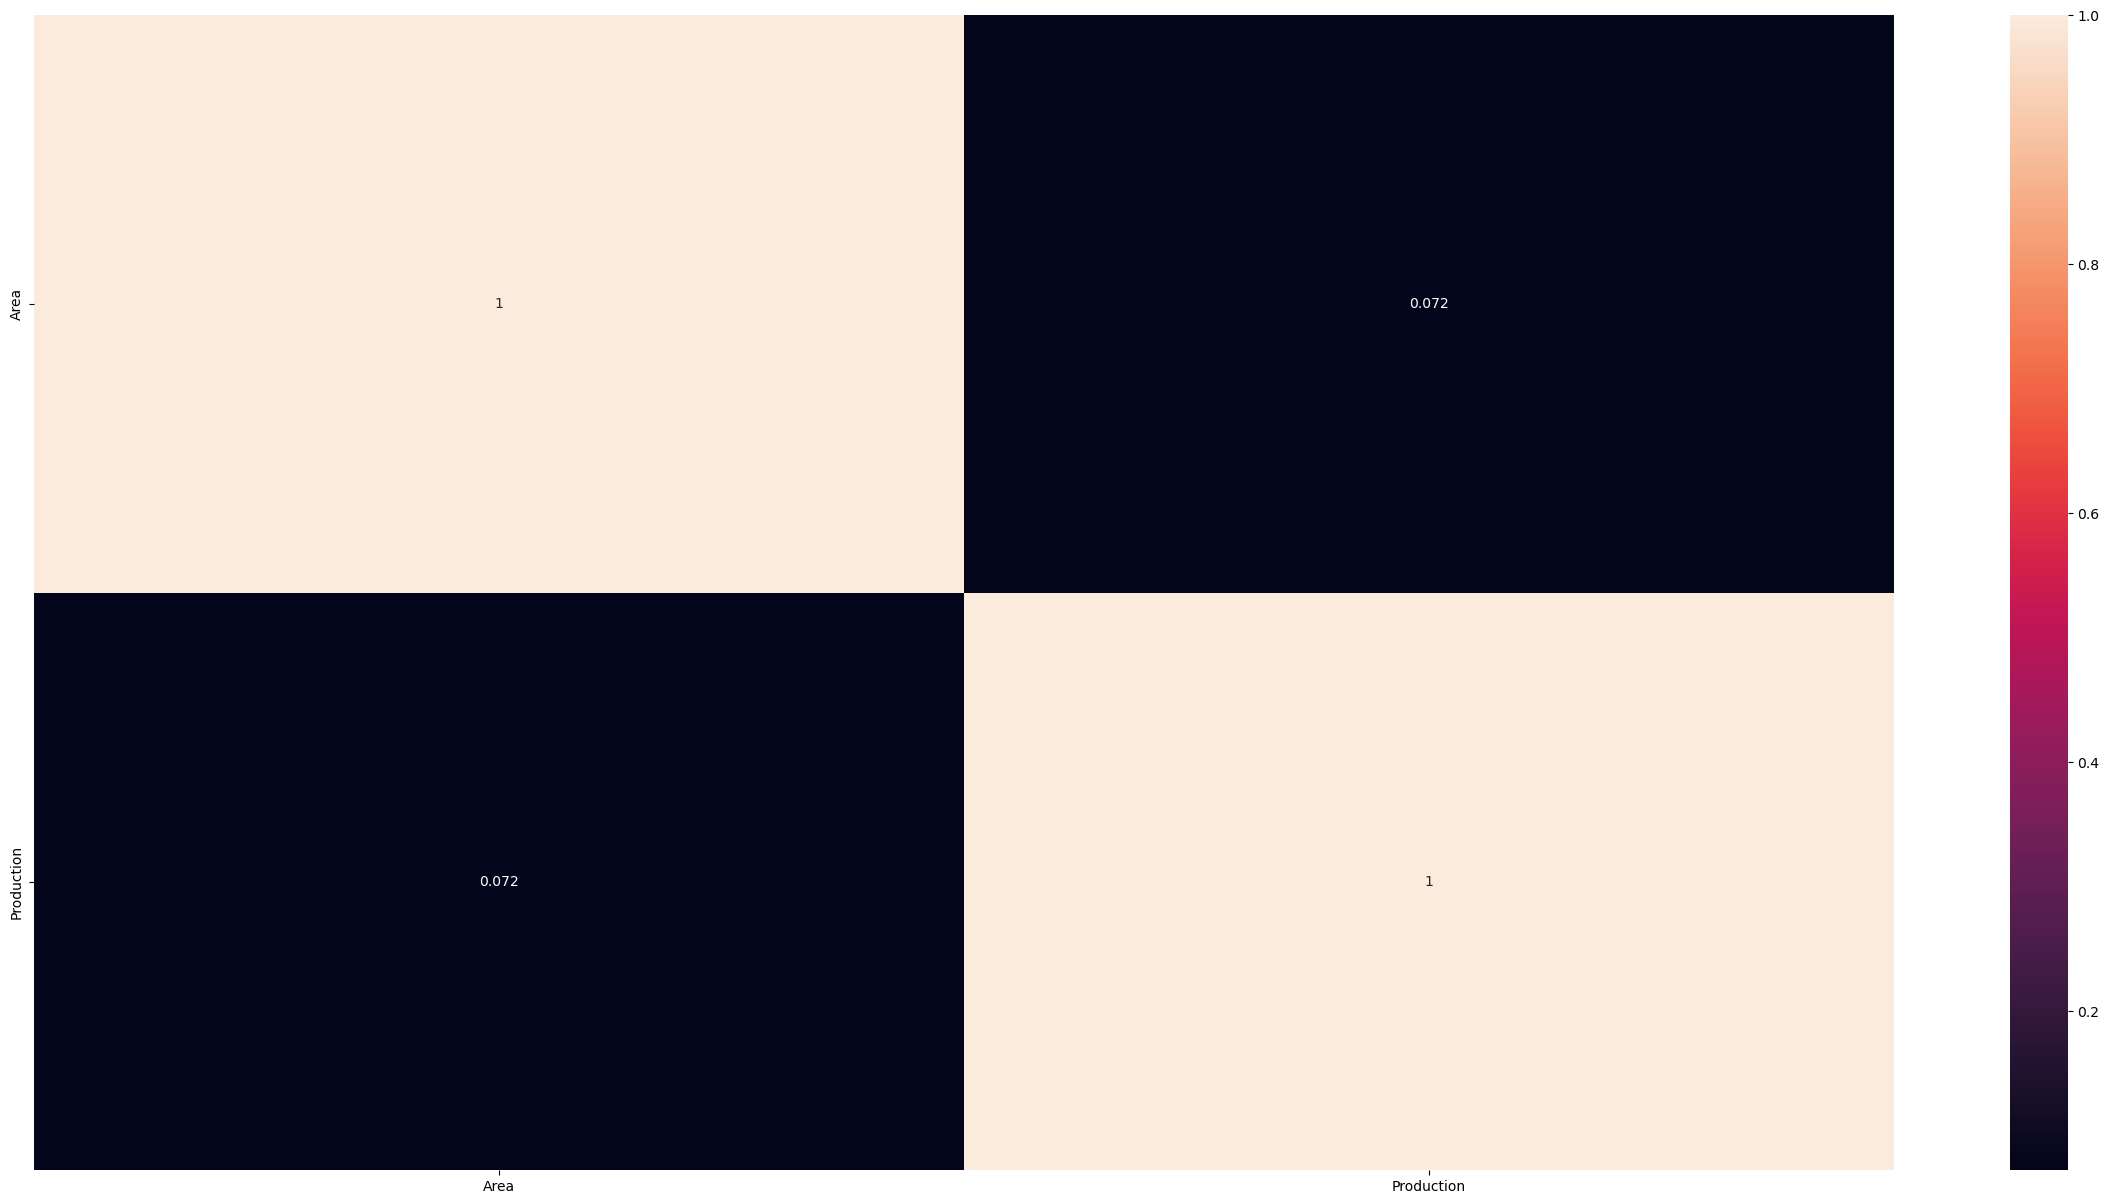

In [69]:
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Area', ylabel='Production'>

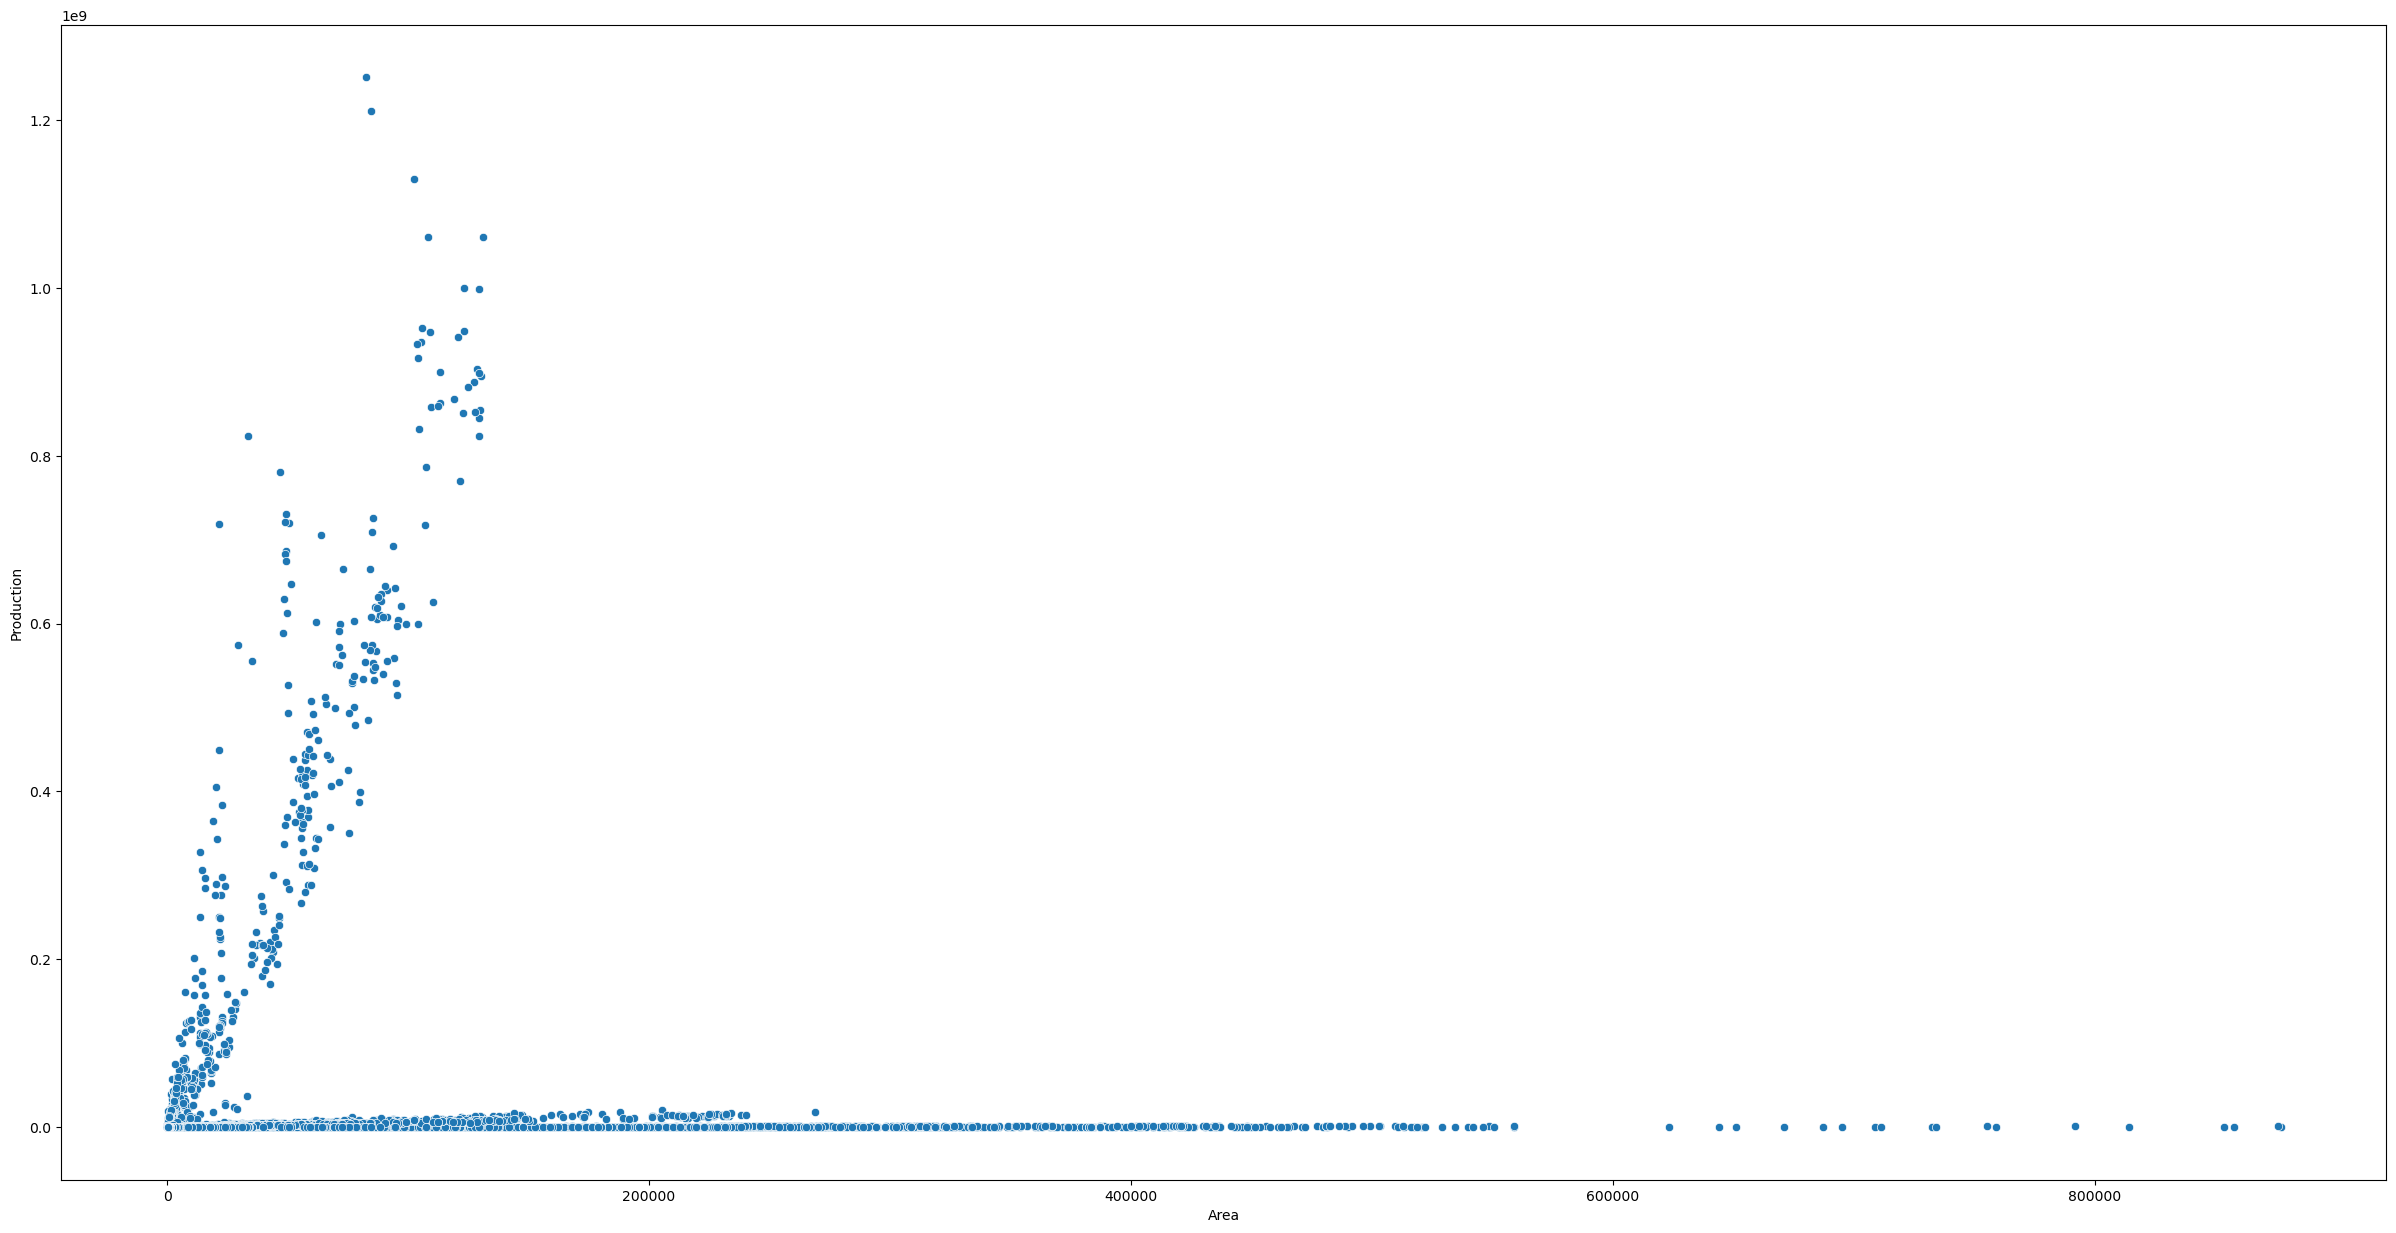

In [71]:
sns.scatterplot(x="Area", y="Production",data=train)

<Figure size 800x800 with 0 Axes>

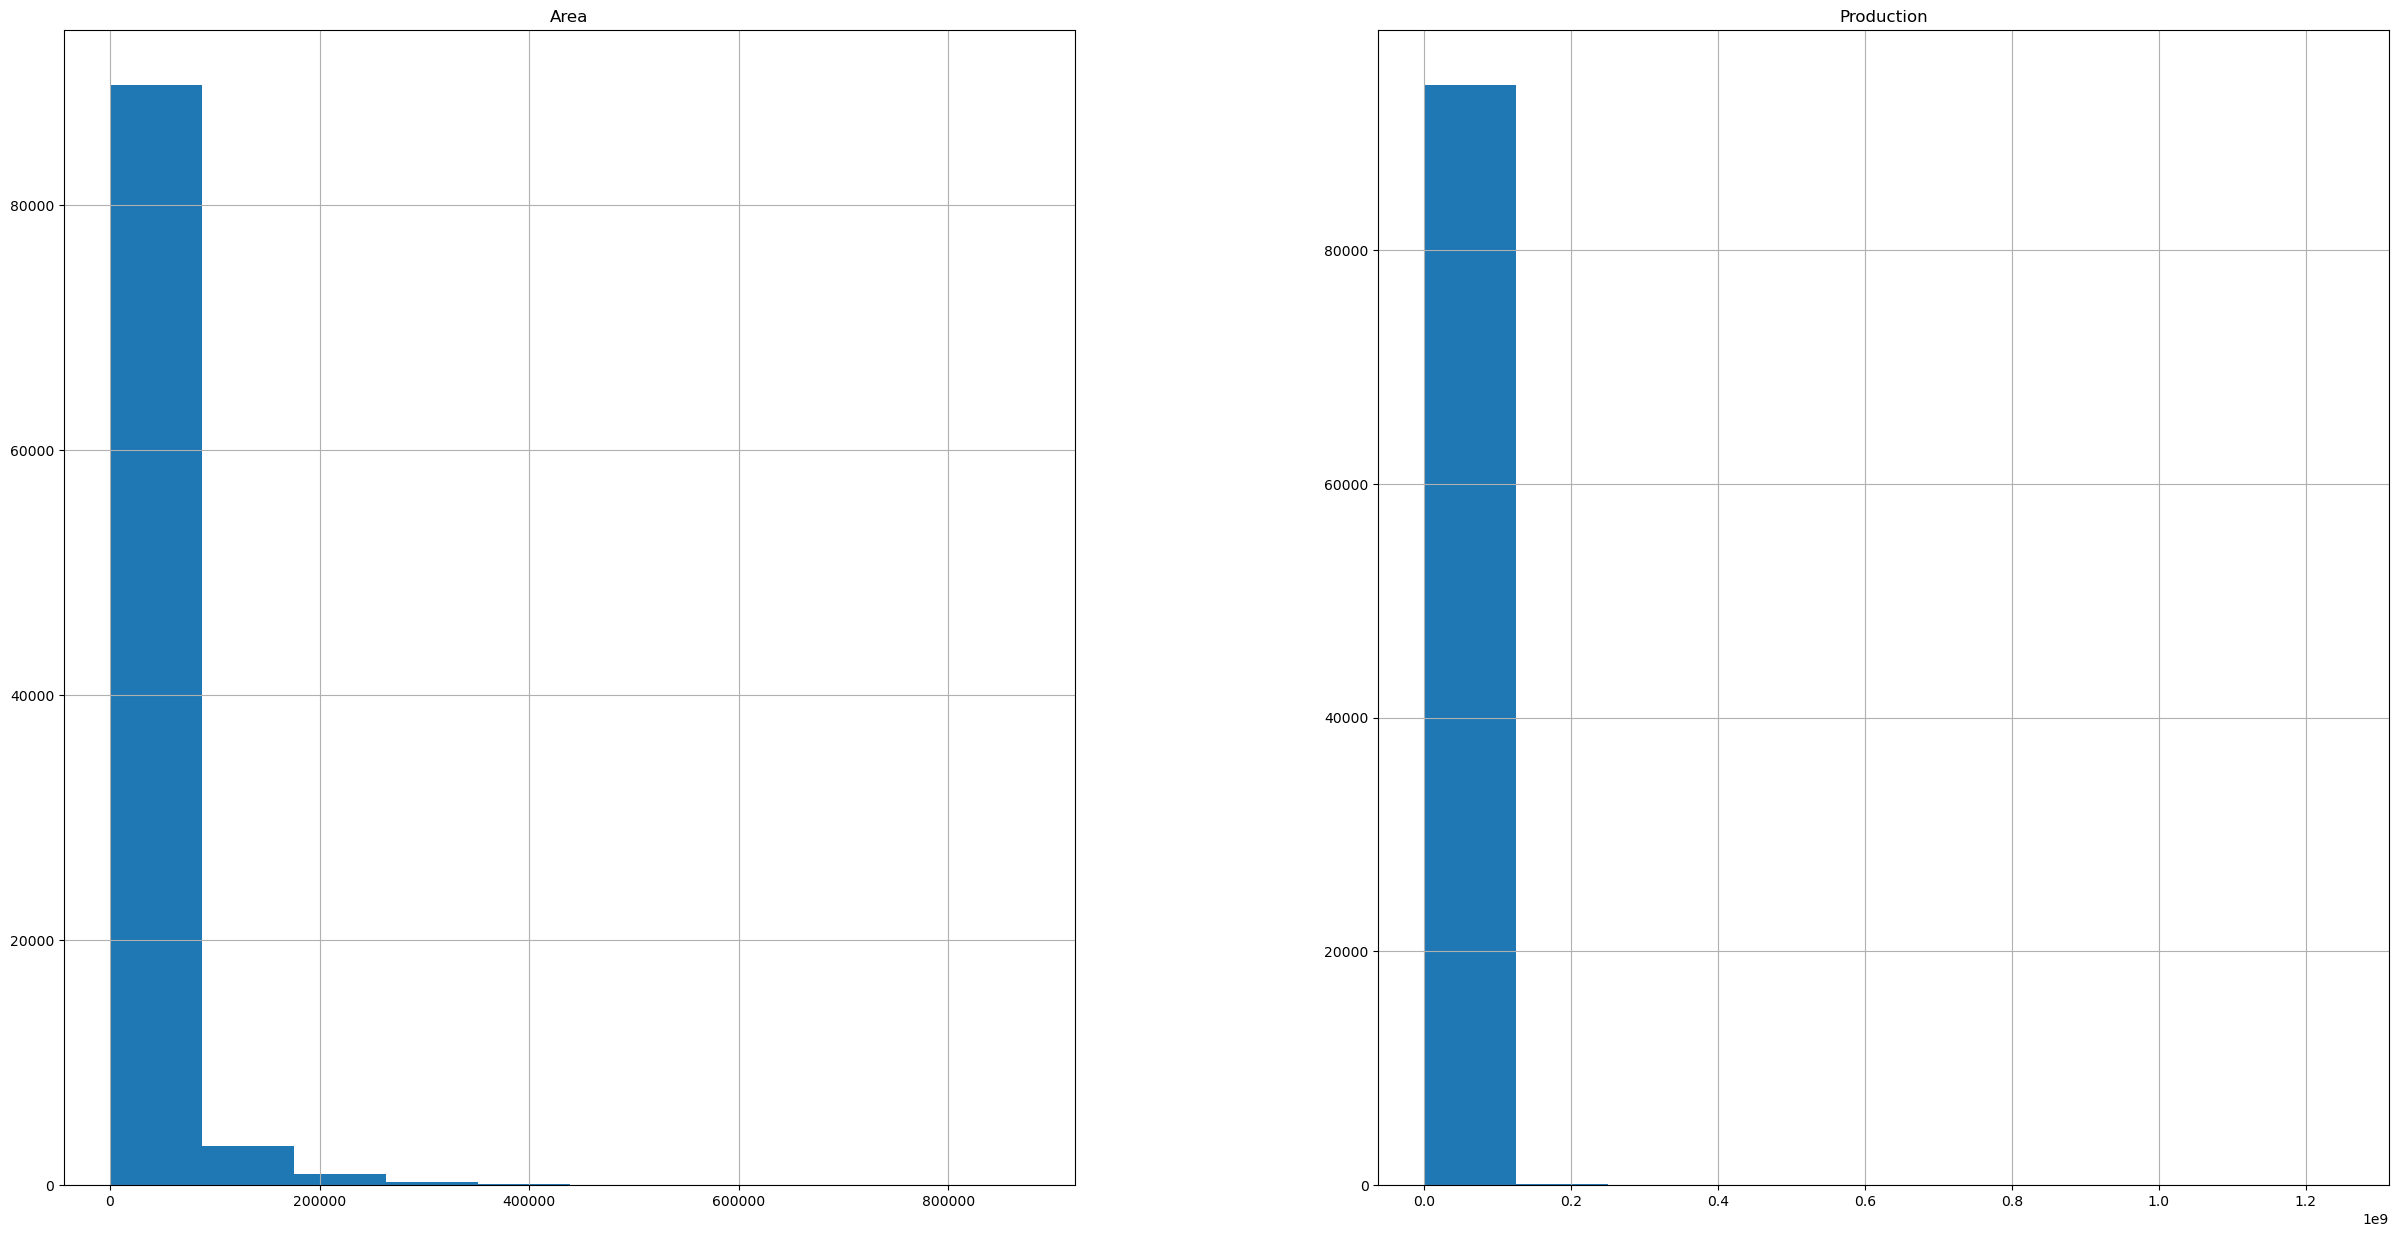

In [72]:
plt.figure(figsize=(8,8))
train.hist()
plt.show()

In [24]:
train['soil_type'].unique()

array([6, 3, 5, 0, 2, 4], dtype=object)

In [25]:
X=train[["State_Name","Crop","Area","soil_type"]]
y=train["Production"]

In [26]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [74]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor( random_state=0)
regressor.fit(X,y)

RandomForestRegressor(random_state=0)

In [89]:
print(regressor.score(X,y))

C:\Users\K C T\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestRegressor is expecting 4 features as input.

In [45]:
X

,State_Name,Crop,Area,soil_type
0,0,0,1254.0,6
1,0,0,1254.0,6
2,0,0,1258.0,6
3,0,0,1261.0,6
4,0,0,1264.7,6
...,...,...,...,...
94370,10,14,270.0,5
94371,10,14,284.0,5
94372,10,14,294.0,5
94373,10,14,289.0,5


In [86]:


from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([10.5, 20.3, 30.1])  # Continuous target variable

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

# Predict target variable for a new input
X_new = np.array([[7, 8]])
y_pred = model.predict(X_new)

In [92]:
y_pred

array([20.3])

ValueError: Expected 2D array, got 1D array instead:
array=[2.346e+04 1.370e+02 1.400e+02 ... 2.800e+01 4.000e+00 1.310e+05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
y

0        2000.00
1        2061.00
2        2083.00
3        1525.00
4         805.85
          ...   
94370     166.00
94371     229.00
94372     261.00
94373     178.00
94374     378.00
Name: Production, Length: 94375, dtype: float64

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, n_features=5)
predictionss=regressor.predict([[0,0,1254.0,6,8]])
pred=format(int(predictionss[0]))

TypeError: __init__() got an unexpected keyword argument 'n_features'

In [30]:
pred

'2024'

In [31]:
2064/1254.0

1.645933014354067

In [32]:
import pickle

pickle.dump(regressor,open('yield.pkl','wb'))

In [33]:
model = pickle.load(open('yield.pkl', 'rb'))